<a href="https://colab.research.google.com/github/Vaishnavi741/STOCK-PREDICTION12/blob/main/LINEAR_REGRESSION_USING_PAST_VALUES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd


In [3]:
dir="/content/drive/MyDrive/Colab Notebooks/Aug31_Price_series (1).xlsx"
data=pd.read_excel(dir,index_col='time HHMMSS')

In [4]:
data

,Spot price ltp NIFTY50,Price of Synthetic option derived future,price NIFTY23AUGFUT
time HHMMSS,,,
09:15:01,19375.55,19358.529510,19359.125
09:15:10,19361.80,19338.013578,19340.300
09:15:51,19358.50,19341.881400,19342.100
09:16:31,19374.25,19355.645595,19355.450
09:17:11,19374.25,19355.705598,19356.450
...,...,...,...
15:26:59,19262.45,19253.006319,19251.850
15:27:39,19272.85,19253.304164,19252.500
15:28:19,19283.15,19254.661953,19253.200


In [5]:
import numpy as np
import pandas as pd
from numpy import math
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
%matplotlib inline

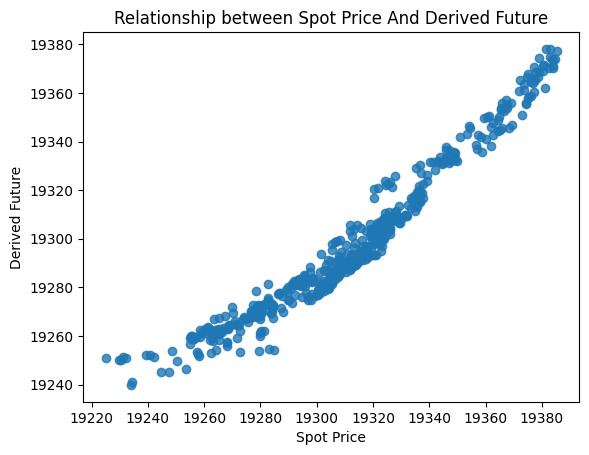

In [6]:
plt.scatter(data['Spot price ltp NIFTY50'],data['Price of Synthetic option derived future'],alpha=0.8)
plt.title('Relationship between Spot Price And Derived Future')
plt.xlabel('Spot Price')
plt.ylabel('Derived Future')
plt.show()

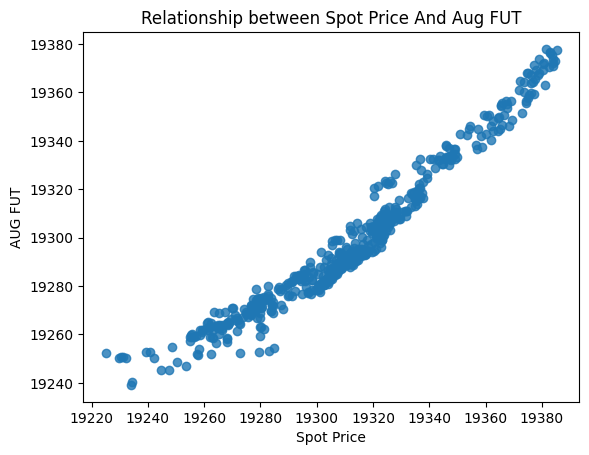

In [7]:
plt.scatter(data['Spot price ltp NIFTY50'],data['price NIFTY23AUGFUT'],alpha=0.8)
plt.title('Relationship between Spot Price And Aug FUT')
plt.xlabel('Spot Price')
plt.ylabel('AUG FUT')
plt.show()

In [33]:
print(data['Spot price ltp NIFTY50'].iloc[0])

data['spot price past values']=data['Spot price ltp NIFTY50'].rolling(window=2).mean()
data.fillna(data['Spot price ltp NIFTY50'].iloc[0],inplace=True)

19375.55


In [34]:
X = data[['price NIFTY23AUGFUT','Price of Synthetic option derived future','spot price past values']].values
y = data['Spot price ltp NIFTY50'].values
print(X)

[[19359.125      19358.52951049 19375.55      ]
 [19340.3        19338.01357848 19368.675     ]
 [19342.1        19341.88140031 19360.15      ]
 ...
 [19253.2        19254.66195256 19278.        ]
 [19254.5        19254.31277906 19284.025     ]
 [19252.825      19254.03573935 19282.2       ]]


In [35]:
size = int(len(X) * 0.66)
x_train, x_test = X[0:size], X[size:len(X)]
y_train,y_test=y[0:size], y[size:len(X)]
history = [x for x in x_train]
predictions = list()
print(history)

[array([19359.125     , 19358.52951049, 19375.55      ]), array([19340.3       , 19338.01357848, 19368.675     ]), array([19342.1       , 19341.88140031, 19360.15      ]), array([19355.45      , 19355.64559487, 19366.375     ]), array([19356.45      , 19355.70559824, 19374.25      ]), array([19357.6       , 19357.76812239, 19374.7       ]), array([19363.15      , 19362.03799722, 19378.1       ]), array([19359.575     , 19358.74612612, 19378.675     ]), array([19359.15      , 19360.46627525, 19376.7       ]), array([19350.6       , 19352.47521398, 19371.8       ]), array([19354.75      , 19353.12459455, 19366.025     ]), array([19354.425     , 19353.82549903, 19365.6       ]), array([19350.85      , 19350.49768399, 19363.375     ]), array([19350.25      , 19350.17141126, 19360.725     ]), array([19350.525    , 19349.5215243, 19359.825    ]), array([19344.95      , 19346.31019342, 19356.725     ]), array([19342.925     , 19341.83894121, 19352.525     ]), array([19345.925     , 19345.6530

In [36]:
regressor=LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [37]:
regressor.intercept_,regressor.coef_

(166.26951465584352, array([0.06501981, 0.03157016, 0.89488821]))

In [38]:
y_pred_train=regressor.predict(x_train)

In [39]:
y_pred=regressor.predict(x_test)

In [40]:
mean_squared_error(y_test, y_pred)

6.335739797664696

In [41]:
mean_squared_error(y_train, y_pred_train)

2.5555167937461145

In [42]:
r2_score(y_train, y_pred_train)

0.995852873744373

In [43]:
r2_score(y_pred, y_test)

0.9827355514656639

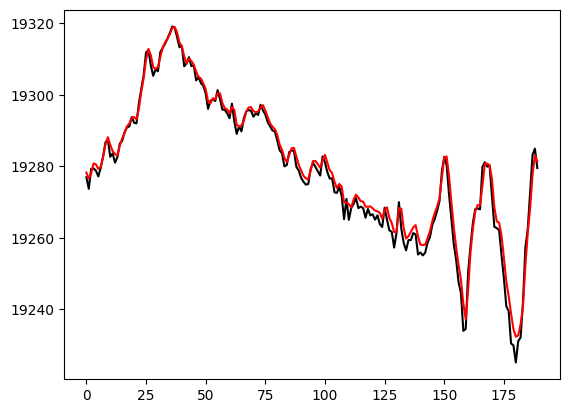

In [45]:
plt.plot(y_test,color='black')
plt.plot(y_pred, color='red')
plt.show()